# Visualizing the PyQSOFit output fits files

## Learning Goals
- know about the output fits file structure as well as how to visualize/read the spectral fitting results

## Introduction 

SDSS-V DR19 quasar catalog include ~80k objects with detailed spectral parameters of DR19 quasars using the latest version of [PyQSOFit](https://github.com/legolason/PyQSOFit) with host decomposition priors. The recipe are similar to what we have described in the [SDSS DR16Q catalog](https://iopscience.iop.org/article/10.3847/1538-4365/ac9ead/meta) and [DESI EDR catalog](https://iopscience.iop.org/article/10.3847/2515-5172/acf580/meta). Please also refer to [DR16Q github](https://github.com/QiaoyaWu/sdss4_dr16q_tutorial/tree/main) for more information.

Each objects in the DR19 quasar VAC is associated with a PyQSOFit output FITS file for further sanity check. Here we demonstrate the FITS file structure as well as the visualization.


## Import packages

This tutorial requires four commonly used python packages

- ``numpy`` for doing large array operations
- ``matplotlib`` for plotting
- ``astropy`` for reading fits table
- ``scipy`` for computing the line properties

Missing packages can be installed via ``!pip install [package]``

In [1]:
# import packages

import os,sys,time
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import interpolate
from scipy import integrate
from astropy.table import Table
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
from astropy.modeling.physical_models import BlackBody
from astropy import constants as const
from astropy import units as u

set up parameters for plotting

In [2]:
def set_mpl_style(fsize=15, tsize=18, tdir='in', major=5.0, minor=3.0, lwidth=1.8, lhandle=2.0):
    """Function to set MPL style"""

    plt.style.use('default')
    plt.rcParams['text.usetex'] = False
    plt.rcParams["axes.axisbelow"] = False
    plt.rcParams['font.size'] = fsize
    plt.rcParams['legend.fontsize'] = tsize
    plt.rcParams['xtick.direction'] = tdir
    plt.rcParams['ytick.direction'] = tdir
    plt.rcParams['ytick.right'] = True
    plt.rcParams['xtick.top'] = True
    plt.rcParams['xtick.major.size'] = major
    plt.rcParams['xtick.minor.size'] = minor
    plt.rcParams['ytick.major.size'] = major
    plt.rcParams['ytick.minor.size'] = minor
    plt.rcParams['xtick.major.width'] = lwidth
    plt.rcParams['xtick.minor.width'] = lwidth
    plt.rcParams['ytick.major.width'] = lwidth
    plt.rcParams['ytick.minor.width'] = lwidth
    plt.rcParams['axes.linewidth'] = lwidth
    plt.rcParams['legend.handlelength'] = lhandle
    return

set_mpl_style(major=8.0,minor=4.0,lwidth=1.2)

## Reading the FITS file

You will need the PyQSOFit output FITS file ready before continue.


Although the VAC is not necessary needed, it contains already computed line properties for this one object for direct use. 

The SDSS DR19Q VAC ``DR19Q_prop-v6_1_3.fits`` can be downloaded at [here](https://data.sdss.org/sas/dr19/vac/bhm/qso-properties/1.0.1/DR19Q_prop-v6_1_3.fits) (335 MB).

In [ ]:
# read in the SDSS-V quasar catalog
sdss5_cat = fits.getdata('DR19Q_prop-v6_1_3.fits', 1)

This is the object FITS file which associated to the 'FITS_FILE' column in the SDSS-V quasar catalog.

The data product for each quasar objects in this VAC will be publically available after SDSS DR19 published. Please follow the associated [repo](https://github.com/QiaoyaWu/SDSSV_DR19_QSO_VAC/tree/main) for more information.

The output FITS file for the object demonstrated in this tutorial can be access through [here](https://github.com/QiaoyaWu/SDSSV_DR19_QSO_VAC/blob/main/op_102359-60089-27021598149616104.fits).

Please have the output FITS file ready and update the path.

In [ ]:
obj = '102359-60089-27021598149616104'
specpath = f"../op_fits/v6_1_3/{obj.split('-')[0]:06}/{obj.split('-')[1]}/op_{obj}.fits"

print the computed properties from the VAC

In [ ]:
Table(sdss5_cat[sdss5_cat['FITS_FILE']==obj])

FIELD,MJD,CATALOGID,FITS_FILE,VERSION,RA,DEC,NEXP,EXPTIME,PROGRAMNAME,SURVEY,Z_PIPE,FIRSTCARTON,OBJTYPE,CLASS,SUBCLASS,VI_REMARK,Z_VI,Z_FIT,Z_SYS,Z_SYS_ERR,SN_RATIO_CONTI,EBV,CONTI_PARA,CONTI_PARA_ERR,FE_UV_PARA,FE_UV_PARA_ERR,FE_OP_PARA,FE_OP_PARA_ERR,LOGL1350,LOGL1350_ERR,LOGL1700,LOGL1700_ERR,LOGL2500,LOGL2500_ERR,LOGL3000,LOGL3000_ERR,LOGL4200,LOGL4200_ERR,LOGL5100,LOGL5100_ERR,CONTI_NPIX,FRAC_HOST_4200,FRAC_HOST_5100,DN4000,HOST_DECOMP_PARA,HALPHA,HALPHA_ERR,HALPHA_BR,HALPHA_BR_ERR,HALPHA_NA,HALPHA_NA_ERR,NII6549,NII6549_ERR,NII6585,NII6585_ERR,SII6718,SII6718_ERR,SII6732,SII6732_ERR,HBETA,HBETA_ERR,HBETA_BR,HBETA_BR_ERR,HEII4687,HEII4687_ERR,HEII4687_BR,HEII4687_BR_ERR,OIII5007,OIII5007_ERR,OIII5007C,OIII5007C_ERR,OIII4960,OIII4960_ERR,OIII4960C,OIII4960C_ERR,HGAMMA,HGAMMA_ERR,HDELTA,HDELTA_ERR,CAII3934,CAII3934_ERR,OII3728,OII3728_ERR,NEV3426,NEV3426_ERR,MGII,MGII_ERR,MGII_BR,MGII_BR_ERR,CIII_BR,CIII_BR_ERR,SIIII1892,SIIII1892_ERR,ALIII1857,ALIII1857_ERR,NIII1750,NIII1750_ERR,CIV,CIV_ERR,HEII1640,HEII1640_ERR,HEII1640_BR,HEII1640_BR_ERR,SIIV_OIV,SIIV_OIV_ERR,OI1304,OI1304_ERR,LYA,LYA_ERR,NV1240,NV1240_ERR,Ha_STAT,Hb_STAT,Hr_STAT,Hd_STAT,MgII_STAT,CIII_STAT,CIV_STAT,SiIV_STAT,Lya_STAT,CaII_STAT,OII_STAT,NeV_STAT,LOGLBOL,LOGLBOL_ERR,LOGMBH_HB,LOGMBH_HB_ERR,LOGMBH_MGII,LOGMBH_MGII_ERR,LOGMBH_CIV,LOGMBH_CIV_ERR,LOGMBH,LOGMBH_ERR,LOGLLEDD_RATIO,LOGLLEDD_RATIO_ERR,ZSYS_BEST,ZSYS_BEST_ERR,ZSYS_WEIGHT,ZSYS_WEIGHT_ERR,ZSYS_LINES,ZSYS_LINES_ERR
int64,int64,int64,str40,str40,float64,float64,int64,float64,str14,str13,float64,str48,str16,str6,str21,str12,float64,float64,float64,float64,float64,float64,float64[5],float64[5],float64[3],float64[3],float64[3],float64[3],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[5],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[2],float64[2],float64[2],float64[2],float64[2],float64[2],float64[2],float64[2],float64[2],float64[2],float64[2],float64[2],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[8],float64[8]
102359,60089,27021598149616104,102359-60089-27021598149616104,v6_1_3,221.403908936,-1.75622888404,3,2700.0,bhm_spiders,BHM,0.2583529055118561,bhm_spiders_agn_lsdr8,science,QSO,,,-1.0,0.2583529,0.2577940193324294,0.0003482834092633025,7.697188222136646,0.0435907694103125,12.231577417587404 .. -0.0002116453778117,0.4381249363305528 .. 2.9754970258988008e-05,0.0 .. 0.0,0.0 .. 0.0,0.5907191402698686 .. -0.0019911178737501,0.0689370227568986 .. 0.0006349086429218,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,43.637632490029546,0.0085029316773841,43.59788967321541,0.0095399690020272,1837.0,0.4529041098191978,0.5302888002057865,1.396130348649827,111.03028184803136 .. 0.6971524533347258,6561.726786939041 .. 6562.930853988406,0.4992470884176327 .. 0.419592089402613,6566.279511010526 .. 6565.641169017501,0.7950437639719894 .. 0.5360526140239017,6561.641583475599 .. 6561.64286332082,0.4245526961512951 .. 0.1382212655048533,6546.883847523687 .. 6546.885124490418,0.4235978380552296 .. 0.13791039315538,6582.299310486462 .. 6582.300594360963,0.42588929669364 .. 0.1386564214240024,6715.248034335925 .. 6715.249344142016,0.4344913726290542 .. 0.14145699207711,6729.62152

**demonstrate the fits file extension=1, which saves the basic fitting results**

In [ ]:
op_data = fits.getdata(specpath, 1)
Table(op_data)

target_info,plateid,MJD,fiberid,ra,dec,redshift,SN_ratio_conti,EBV,Fe_uv_norm,Fe_uv_norm_err,Fe_uv_FWHM,Fe_uv_FWHM_err,Fe_uv_shift,Fe_uv_shift_err,Fe_op_norm,Fe_op_norm_err,Fe_op_FWHM,Fe_op_FWHM_err,Fe_op_shift,Fe_op_shift_err,PL_norm,PL_norm_err,PL_slope,PL_slope_err,Blamer_norm,Blamer_norm_err,Balmer_Te,Balmer_Te_err,Balmer_Tau,Balmer_Tau_err,conti_a_0,conti_a_0_err,conti_a_1,conti_a_1_err,conti_a_2,conti_a_2_err,L1350,L1350_err,L1450,L1450_err,L1700,L1700_err,L2500,L2500_err,L3000,L3000_err,L4200,L4200_err,L5100,L5100_err,Fe_flux_4435_4685,Fe_flux_4435_4685_err,SN_host,rchi2_decomp,frac_host_4200,frac_host_5100,Dn4000,sigma,sigma_err,v_off,v_off_err,rchi2_ppxf,gal_par_0,gal_par_1,gal_par_2,gal_par_3,gal_par_4,qso_par_0,qso_par_1,qso_par_2,qso_par_3,qso_par_4,qso_par_5,qso_par_6,qso_par_7,qso_par_8,qso_par_9,1_complex_name,1_line_status,1_line_min_chi2,1_line_bic,1_line_red_chi2,1_niter,1_ndof,2_complex_name,2_line_status,2_line_min_chi2,2_line_bic,2_line_red_chi2,2_niter,2_ndof,3_complex_name,3_line_status,3_line_min_chi2,3_line_bic,3_line_red_chi2,3_niter,3_ndof,4_complex_name,4_line_status,4_line_min_chi2,4_line_bic,4_line_red_chi2,4_niter,4_ndof,Hdelta_br_1_scale,Hdelta_br_1_scale_err,Hdelta_br_1_centerwave,Hdelta_br_1_centerwave_err,Hdelta_br_1_sigma,Hdelta_br_1_sigma_err,Hdelta_na_1_scale,Hdelta_na_1_scale_err,Hdelta_na_1_centerwave,Hdelta_na_1_centerwave_err,Hdelta_na_1_sigma,Hdelta_na_1_sigma_err,Hgamma_br_1_scale,Hgamma_br_1_scale_err,Hgamma_br_1_centerwave,Hgamma_br_1_centerwave_err,Hgamma_br_1_sigma,Hgamma_br_1_sigma_err,Hgamma_na_1_scale,Hgamma_na_1_scale_err,Hgamma_na_1_centerwave,Hgamma_na_1_centerwave_err,Hgamma_na_1_sigma,Hgamma_na_1_sigma_err,Hbeta_br_1_scale,Hbeta_br_1_scale_err,Hbeta_br_1_centerwave,Hbeta_br_1_centerwave_err,Hbeta_br_1_sigma,Hbeta_br_1_sigma_err,Hbeta_br_2_scale,Hbeta_br_2_scale_err,Hbeta_br_2_centerwave,Hbeta_br_2_centerwave_err,Hbeta_br_2_sigma,Hbeta_br_2_sigma_err,Hbeta_na_1_scale,Hbeta_na_1_scale_err,Hbeta_na_1_centerwave,Hbeta_na_1_centerwave_err,Hbeta_na_1_sigma,Hbeta_na_1_sigma_err,OIII4959c_1_scale,OIII4959c_1_scale_err,OIII4959c_1_centerwave,OIII4959c_1_centerwave_err,OIII4959c_1_sigma,OIII4959c_1_sigma_err,OIII5007c_1_scale,OIII5007c_1_scale_err,OIII5007c_1_centerwave,OIII5007c_1_centerwave_err,OIII5007c_1_sigma,OIII5007c_1_sigma_err,OIII4959w_1_scale,OIII4959w_1_scale_err,OIII4959w_1_centerwave,OIII4959w_1_centerwave_err,OIII4959w_1_sigma,OIII4959w_1_sigma_err,OIII5007w_1_scale,OIII5007w_1_scale_err,OIII5007w_1_centerwave,OIII5007w_1_centerwave_err,OIII5007w_1_sigma,OIII5007w_1_sigma_err,HeII4687_br_1_scale,HeII4687_br_1_scale_err,HeII4687_br_1_centerwave,HeII4687_br_1_centerwave_err,HeII4687_br_1_sigma,HeII4687_br_1_sigma_err,HeII4687_na_1_scale,HeII4687_na_1_scale_err,HeII4687_na_1_centerwave,HeII4687_na_1_centerwave_err,HeII4687_na_1_sigma,HeII4687_na_1_sigma_err,Halpha_br_1_scale,Halpha_br_1_scale_err,Halpha_br_1_centerwave,Halpha_br_1_centerwave_err,Halpha_br_1_sigma,Halpha_br_1_sigma_err,Halpha_br_2_scale,Halpha_br_2_scale_err,Halpha_br_2_centerwave,Halpha_br_2_centerwave_err,Halpha_br_2_sigma,Halpha_br_2_sigma_err,Halpha_br_3_scale,Halpha_br_3_scale_err,Halpha_br_3_centerwave,Halpha_br_3_centerwave_err,Halpha_br_3_sigma,Halpha_br_3_sigma_err,Halpha_na_1_scale,Halpha_na_1_scale_err,Halpha_na_1_centerwave,Halpha_na_1_centerwave_err,Halpha_na_1_sigma,Halpha_na_1_sigma_err,NII6549_1_scale,NII6549_1_scale_err,NII6549_1_centerwave,NII6549_1_centerwave_err,NII6549_1_sigma,NII6549_1_sigma_err,NII6585_1_scale,NII6585_1_scale_err,NII6585_1_centerwave,NII6585_1_centerwave_err,NII6585_1_sigma,NII6585_1_sigma_err,SII6718_1_scale,SII6718_1_scale_err,SII6718_1_centerwave,SII6718_1_centerwave_err,SII6718_1_sigma,SII6718_1_sigma_err,SII6732_1_scale,SII6732_1_scale_err,SII6732_1_centerwave,SII6732_1_centerwave_err,SII6732_1_sigma,SII6732_1_sigma_err,loc_1_complex_name,loc_1_line_status,loc_1_line_min_chi2,loc_1_line_bic,loc_1_line_red_chi2,loc_1_niter,loc_1_ndof,loc_2_complex_name,loc_2_li

**demonstrate the fits file extension=2, which saves the MC fitting results**

In [ ]:
op_dataMC = fits.getdata(specpath, 2)
Table(op_dataMC)

Fe_uv_norm_MC,Fe_uv_FWHM_MC,Fe_uv_shift_MC,Fe_op_norm_MC,Fe_op_FWHM_MC,Fe_op_shift_MC,PL_norm_MC,PL_slope_MC,Blamer_norm_MC,Balmer_Te_MC,Balmer_Tau_MC,conti_a_0_MC,conti_a_1_MC,conti_a_2_MC,Hdelta_br_1_scale_MC,Hdelta_br_1_centerwave_MC,Hdelta_br_1_sigma_MC,Hdelta_na_1_scale_MC,Hdelta_na_1_centerwave_MC,Hdelta_na_1_sigma_MC,Hgamma_br_1_scale_MC,Hgamma_br_1_centerwave_MC,Hgamma_br_1_sigma_MC,Hgamma_na_1_scale_MC,Hgamma_na_1_centerwave_MC,Hgamma_na_1_sigma_MC,Hbeta_br_1_scale_MC,Hbeta_br_1_centerwave_MC,Hbeta_br_1_sigma_MC,Hbeta_br_2_scale_MC,Hbeta_br_2_centerwave_MC,Hbeta_br_2_sigma_MC,Hbeta_na_1_scale_MC,Hbeta_na_1_centerwave_MC,Hbeta_na_1_sigma_MC,OIII4959c_1_scale_MC,OIII4959c_1_centerwave_MC,OIII4959c_1_sigma_MC,OIII5007c_1_scale_MC,OIII5007c_1_centerwave_MC,OIII5007c_1_sigma_MC,OIII4959w_1_scale_MC,OIII4959w_1_centerwave_MC,OIII4959w_1_sigma_MC,OIII5007w_1_scale_MC,OIII5007w_1_centerwave_MC,OIII5007w_1_sigma_MC,HeII4687_br_1_scale_MC,HeII4687_br_1_centerwave_MC,HeII4687_br_1_sigma_MC,HeII4687_na_1_scale_MC,HeII4687_na_1_centerwave_MC,HeII4687_na_1_sigma_MC,Halpha_br_1_scale_MC,Halpha_br_1_centerwave_MC,Halpha_br_1_sigma_MC,Halpha_br_2_scale_MC,Halpha_br_2_centerwave_MC,Halpha_br_2_sigma_MC,Halpha_br_3_scale_MC,Halpha_br_3_centerwave_MC,Halpha_br_3_sigma_MC,Halpha_na_1_scale_MC,Halpha_na_1_centerwave_MC,Halpha_na_1_sigma_MC,NII6549_1_scale_MC,NII6549_1_centerwave_MC,NII6549_1_sigma_MC,NII6585_1_scale_MC,NII6585_1_centerwave_MC,NII6585_1_sigma_MC,SII6718_1_scale_MC,SII6718_1_centerwave_MC,SII6718_1_sigma_MC,SII6732_1_scale_MC,SII6732_1_centerwave_MC,SII6732_1_sigma_MC,OII_PL_norm_MC,OII_PL_slope_MC,OII3728_1_scale_MC,OII3728_1_centerwave_MC,OII3728_1_sigma_MC,CaII_PL_norm_MC,CaII_PL_slope_MC,CaII3934_1_scale_MC,CaII3934_1_centerwave_MC,CaII3934_1_sigma_MC,CaII3934_2_scale_MC,CaII3934_2_centerwave_MC,CaII3934_2_sigma_MC
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.0,3000.0,0.0,0.5905714806075935,1861.8848778329073,-0.0021024725174129885,11.516817499668264,0.4411332795194056,0.0,15000.0,0.5,-10193.76983332039,3.1873242342138326,-0.000372728744004997,0.4545352982887607,8.318117772305094,0.006605270528248096,1.9094947845132992,8.317045226107732,0.0009611151662255198,3.0698832365061435,8.377206216874875,0.0036800629074643836,3.0008695528493945,8.377860452462858,0.00028238244317706023,1.9323387334679865,8.489744438708177,0.0020000000956372317,3.722107622117221,8.489494026620783,0.004837901418202109,4.2757913876201314,8.488881493386607,0.0005462067138319278,4.278678522595669,8.50875701981483,0.0005462067138319278,14.30487506226541,8.518375778970103,0.0005462067138319278,2.060336901088533,8.507394009839857,0.0008800709028840251,5.00883279297426,8.51701276899513,0.0008800709028840251,0.8292022624090123,8.457551841231261,0.03737135344433168,0.4619404858630105,8.452087784585338,0.0005462067138319278,2.318412128943237,8.78598459150544,0.0020000001112896524,8.111216143191768,8.789885368877652,0.002000000095275739,4.696952826677148,8.790068306909061,0.005412240546499431,14.050861030234785,8.789042065221594,0.0005309038220390577,2.9734370521339315,8.786790440160559,0.0005309038220390577,8.920311156401795,8.792185375768469,0.0005309038220390577,3.4569180851207193,8.812182018834875,0.0005309038220390577,3.4569180851207193,8.814320156652258,0.0005309038220390577,0.01077415934247

**demonstrate the fits file extension=3, which saves the spectrum**

In [ ]:
op_spec = fits.getdata(specpath, 3)
Table(op_spec)

wave_prereduced,flux_prereduced,err_prereduced,wave_host,flux_host,err_host,flux_pca_qso,flux_pca_host,wave_conti_rej_abs,wave_line_rej_abs
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2900.6647379376836,7.815748100184569,12.316240757820442,3450.6239250370577,12.729542768558046,1.782036834660871,10.7971689953405,2.066793715750085,0.0,4016.0347425105124
2901.331959053145,18.46517441159471,12.934699563852023,3451.4174505858327,10.403287343298784,1.7687672319026064,10.765320176938447,2.0606320537512386,0.0,0.0
2902.000926312846,30.005411412632558,13.3982611697885,3452.2117521987143,11.384189549456842,1.7651258982273204,10.733440210547727,2.0202066479003333,0.0,0.0
2902.6685354603605,17.973959540413535,11.977784494276927,3453.0076059398084,11.651378883013649,1.7750564973690466,10.703336812485784,1.9990580663516426,0.0,0.0
2903.337890752114,3.2889520259469855,12.09315569171424,3453.8019075526895,8.763902069707187,1.6412470950375848,10.674580443893667,1.987597496131251,0.0,0.0
2904.005887931682,42.06876401185191,12.732651598078528,3454.59853735789,8.201664901577569,1.6640078174026571,10.645739786971518,2.0034480454692973,0.0,0.0
2904.6754372394626,15.86864151093875,12.770527898690759,3455.393227002825,13.37873504172455,1.811225007623516,10.6101369108955,2.0500183633565427,0.0,0.0
2905.3438224510837,19.970470498681465,12.468348949404959,3456.189856808025,8.39777858107604,1.6780678682241934,10.551590256822555,2.0411983659247435,0.0,0.0
2906.012013646678,23.043763006590776,12.523139893595346,3456.984934485013,8.19581078515941,1.7272772275910666,10.49315767319101,2.0025208151170375,0.0,0.0


## Visualize the spectral fitting results

Here are some functions for the results visualization


If you are interested in plotting the FeII emissions, please downloaded the [fe_optical](https://github.com/legolason/PyQSOFit/blob/master/src/pyqsofit/fe_optical.txt) and [fe_uv](https://github.com/legolason/PyQSOFit/blob/master/src/pyqsofit/fe_uv.txt) first and then change the path to both files.

In [ ]:
# functions for visualizing the spectrum
def read_sdss5_spec(spec_path, cutoff=100):
    """ functions for reading in the SDSS5 spectrum"""
    spec = fits.getdata(spec_path,1)
    error = np.zeros(len(spec.IVAR))
    error[np.where(spec.IVAR!=0)] = 1/np.sqrt(spec.IVAR[np.where(spec.IVAR!=0)])
    ind_good = np.where((spec.IVAR>0)&(np.isfinite(spec.FLUX))&(np.isfinite(error)), True, False)
    ind_good[:cutoff] = False
    return 10**spec.LOGLAM[ind_good], spec.FLUX[ind_good], error[ind_good]

# fe_uv and fe_optical files are the Fe II templates from the PyQSOFit package
fe_uv = np.genfromtxt('fe_uv.txt')
fe_op = np.genfromtxt('fe_optical.txt')

def Manygauss(xval, pp):
    """ Multiple Gaussian model used to fit the emission lines
    pp=[scale1, center1, sigma1, scale2, center2, sigma2, ...]
    xx in log wavelength space
    """
    return np.sum(pp[:, 0] * np.exp(-(xval[:, np.newaxis] - pp[:, 1]) ** 2 / (2 * pp[:, 2] ** 2)), axis=1)

def PowerLaw(xval, pp):
    """Power law continuum model"""
    return pp[0]*(xval/3000.0)**pp[1]

def PolyConti(xval, pp, x0=3000):
    """Polynomial continuum model"""
    xval2 = xval - x0
    yvals = [(pp[i] / 1e6) * xval2 ** (i + 1) for i in range(len(pp))]
    return np.sum(yvals, axis=0)

def BalmerConti(xval, pp):
    """Fit the Balmer continuum from the model of Dietrich+02"""
    xval = xval * u.AA
    lambda_BE = 3646.  # A
    bb_lam = BlackBody(pp[1] * u.K, scale=1.0 * u.erg / (u.cm ** 2 * u.AA * u.s * u.sr))
    bbflux = bb_lam(xval).value * 3.14  # in units of ergs/cm2/s/A
    tau = pp[2] * (xval.value / lambda_BE) ** 3
    result = pp[0] * bbflux * (1 - np.exp(-tau))
    ind = np.where(xval.value > lambda_BE, True, False)
    if ind.any() == True:
        result[ind] = 0
    return result

def FeII_uv_Conti(xval, pp):
        "Fit the UV FeII component on the continuum from 1200 to 3500 A based on Boroson & Green 1992."
        yval = np.zeros_like(xval)
        wave_Fe_mgii = 10 ** fe_uv[:, 0]
        flux_Fe_mgii = fe_uv[:, 1] * 1e15
        Fe_FWHM = pp[1]
        xval_new = xval * (1.0 + pp[2])

        ind = np.where((xval_new > 1200.) & (xval_new < 3500.), True, False)
        if np.sum(ind) > 100:
            if Fe_FWHM < 900.0:
                sig_conv = np.sqrt(910.0 ** 2 - 900.0 ** 2) / 2. / np.sqrt(2. * np.log(2.))
            else:
                sig_conv = np.sqrt(Fe_FWHM ** 2 - 900.0 ** 2) / 2. / np.sqrt(2. * np.log(2.))  # in km/s
            # Get sigma in pixel space
            sig_pix = sig_conv / 106.3  # 106.3 km/s is the dispersion for the BG92 FeII template
            khalfsz = np.round(4 * sig_pix + 1, 0)
            xx = np.arange(0, khalfsz * 2, 1) - khalfsz
            kernel = np.exp(-xx ** 2 / (2 * sig_pix ** 2))
            kernel = kernel / np.sum(kernel)

            flux_Fe_conv = np.convolve(flux_Fe_mgii, kernel, 'same')
            tck = interpolate.splrep(wave_Fe_mgii, flux_Fe_conv)
            yval[ind] = pp[0] * interpolate.splev(xval_new[ind], tck)
        return yval

def FeII_opt_Conti(xval, pp):
        "Fit the optical FeII on the continuum from 3686 to 7484 A based on Vestergaard & Wilkes 2001"
        yval = np.zeros_like(xval)

        wave_Fe_balmer = 10 ** fe_op[:, 0]
        flux_Fe_balmer = fe_op[:, 1] * 1e15
        ind = np.where((wave_Fe_balmer > 3686.) & (wave_Fe_balmer < 7484.), True, False)
        wave_Fe_balmer = wave_Fe_balmer[ind]
        flux_Fe_balmer = flux_Fe_balmer[ind]
        Fe_FWHM = pp[1]
        xval_new = xval * (1.0 + pp[2])
        ind = np.where((xval_new > 3686.) & (xval_new < 7484.), True, False)
        if np.sum(ind) > 100:
            if Fe_FWHM < 900.0:
                sig_conv = np.sqrt(910.0 ** 2 - 900.0 ** 2) / 2. / np.sqrt(2. * np.log(2.))
            else:
                sig_conv = np.sqrt(Fe_FWHM ** 2 - 900.0 ** 2) / 2. / np.sqrt(2. * np.log(2.))  # in km/s
            # Get sigma in pixel space
            sig_pix = sig_conv / 106.3  # 106.3 km/s is the dispersion for the BG92 FeII template
            khalfsz = np.round(4 * sig_pix + 1, 0)
            xx = np.arange(0, khalfsz * 2, 1) - khalfsz
            kernel = np.exp(-xx ** 2 / (2 * sig_pix ** 2))
            kernel = kernel / np.sum(kernel)
            flux_Fe_conv = np.convolve(flux_Fe_balmer, kernel, 'same')
            tck = interpolate.splrep(wave_Fe_balmer, flux_Fe_conv)
            yval[ind] = pp[0] * interpolate.splev(xval_new[ind], tck)
        return yval

def continuum_all(wave_val, conti_ip_val):
    """ Continuum model for the QSO spectrum"""
    return PowerLaw(wave_val, conti_ip_val[0:2])\
        + PolyConti(wave_val, conti_ip_val[2:5])\
        + FeII_uv_Conti(wave_val, conti_ip_val[5:8])\
        + FeII_opt_Conti(wave_val, conti_ip_val[8:])

def continuum_PL_poly(wave_val, conti_ip_val):
    """ Continuum model for the QSO spectrum
    This is a simplified version of the continuum model
    It only includes the power law and polynomial components"""
    return PowerLaw(wave_val, conti_ip_val[0:2])\
        + PolyConti(wave_val, conti_ip_val[2:5])

def qsofit_op_flux(op_data, op_spec_wave):
    """ Compute the fitted continuum flux and line profiles using the output of PyQSOFit model
    op_data is the output of PyQSOFit model
    op_spec_wave is the wavelength array of the spectrum"""

    conti_keyword = ['PL_norm', 'PL_slope', 'conti_a_0', 'conti_a_1', 'conti_a_2',\
                 'Fe_uv_norm', 'Fe_uv_FWHM', 'Fe_uv_shift', 'Fe_op_norm', 'Fe_op_FWHM', 'Fe_op_shift']
    conti_ip_val = np.array([op_data[conti_keyword[i]] for i in range(len(conti_keyword))])
    conti_flux = continuum_all(op_spec_wave, conti_ip_val)
    
    gaussian_lines = np.array([kw[:-11] for kw in op_data.names if ('centerwave' in kw) and ('err' not in kw) and ('OII3728' not in kw) and ('CaII3934' not in kw) and ('NeV3426' not in kw)])
    gaussian_pp = np.zeros((len(gaussian_lines), 3))
    for i in range(len(gaussian_lines)):
        gaussian_pp[i, 0] = op_data[gaussian_lines[i]+'_scale']
        gaussian_pp[i, 1] = op_data[gaussian_lines[i] + '_centerwave']
        gaussian_pp[i, 2] = op_data[gaussian_lines[i] + '_sigma']
    gaussian_flux = Manygauss(np.log(op_spec_wave), gaussian_pp)

    return conti_flux, gaussian_flux


### plotting the original SDSS spectrum

Please have the original SDSS spectrum downloaded before continue. 

You can retrive the data using ``sdss_access``, more detailed tutorial explained [here](https://github.com/sdss/dr19_tutorials/blob/main/Exploring_BOSS_Spectra_Coadds.ipynb). Or you can download the [spectrum of this object](https://data.sdss.org/sas/dr19/spectro/sdss/redux/v6_1_3/102359/coadd/60089/spSpec-102359-60089-27021598149616104.fits) from the sdss data service.

Once you have the spectra, you can update the path to the FITS file of the SDSS spectrum for visualization.

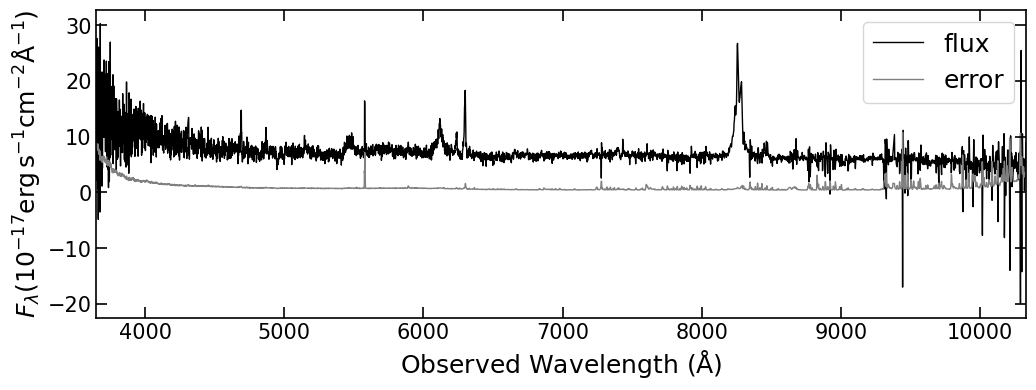

In [ ]:
spec_path_v6_1_3 = ''
specpath_sdss = spec_path_v6_1_3 + f"{obj.split('-')[0]:06}/{obj.split('-')[1]}/spec-{obj}.fits"
wave_sdss5, flux_sdss5, error_sdss5 = read_sdss5_spec(specpath_sdss)

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(wave_sdss5, flux_sdss5, color='black', lw=1, label='flux')
ax.plot(wave_sdss5, error_sdss5, color='grey', lw=1, label='error')
ax.set_xlabel(r'Observed Wavelength ($\rm\AA$)', fontsize=18)
ax.set_xlim(wave_sdss5[0], wave_sdss5[-1])
ax.set_ylabel(r'$F_{\lambda} ({\rm 10^{-17}erg\,s^{-1}cm^{-2}\AA^{-1}})$', fontsize=18)
ax.legend(fontsize=18, loc='upper right')

### visualize the prereduced spectrum
Note that the prereduced spectrum has been 
- corrected for Milky Way extinction;
- shift to the rest frame;
- removed host galaxy if possible


Note that the prereduced spectrum is truncated sometimes due to the wavelength limitation from the host galaxy templates

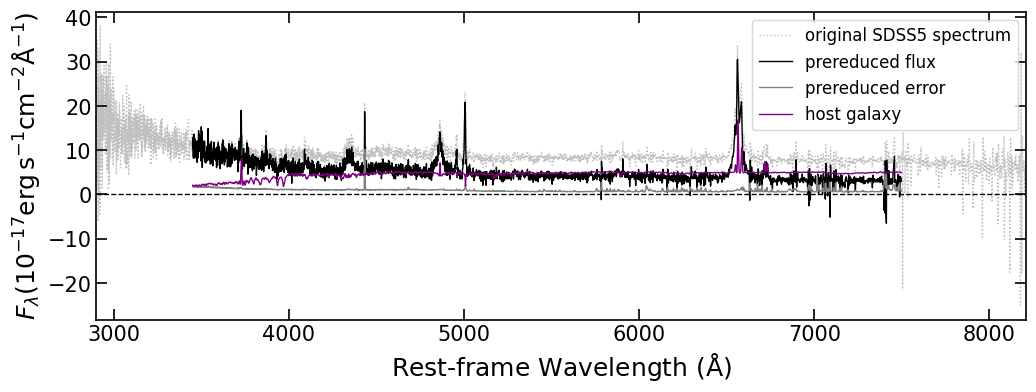

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

if 'wave_host' in op_spec.names:
    wave = op_spec.wave_host
    indwav = wave!=0
    wave = wave[indwav]
    flux = op_spec.flux_host[indwav]
    error = op_spec.err_host[indwav]
    flux_host = op_spec.flux_pca_host[indwav]
else:
    wave = op_spec.wave_prereduced
    flux = op_spec.flux_prereduced
    error = op_spec.error_prereduced

ax.plot(wave_sdss5/(1+op_data.redshift), flux_sdss5*(1+op_data.redshift), color='silver', lw=1, ls=':', label='original SDSS5 spectrum')
ax.plot(wave, flux, color='black', lw=1, label='prereduced flux')
ax.plot(wave, error, color='grey', lw=1, label='prereduced error')
if 'wave_host' in op_spec.names:
    ax.plot(wave, flux_host, color='purple', lw=1, label='host galaxy')
ax.axhline(0, color='black', lw=1, ls='--')
ax.set_xlim(wave_sdss5[0]/(1+op_data.redshift), wave_sdss5[-1]/(1+op_data.redshift))
ax.set_xlabel(r'Rest-frame Wavelength ($\rm\AA$)', fontsize=18)
ax.set_ylabel(r'$F_{\lambda} ({\rm 10^{-17}erg\,s^{-1}cm^{-2}\AA^{-1}})$', fontsize=18)
ax.legend(fontsize=12, loc='upper right')

plot the spectrum fitting results

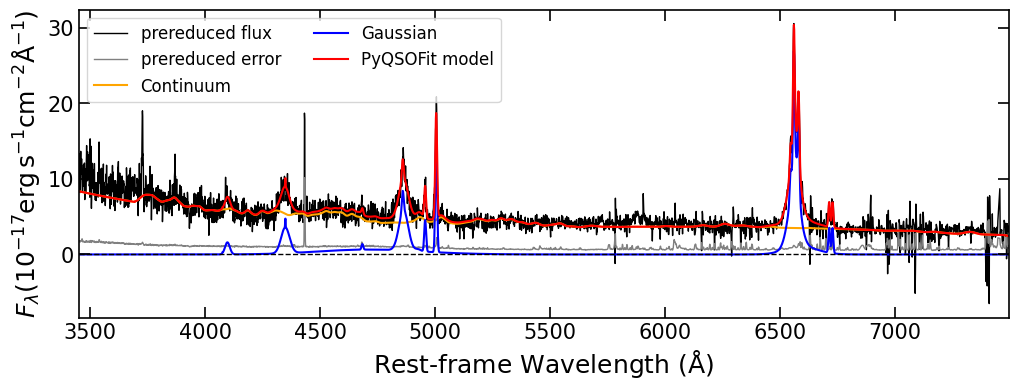

In [ ]:
conti_flux, gaussian_flux = qsofit_op_flux(op_data, wave)

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(wave, flux, color='black', lw=1, label='prereduced flux')
ax.plot(wave, error, color='grey', lw=1, label='prereduced error')

ax.plot(wave, conti_flux, color='orange', lw=1.5, label='Continuum')
ax.plot(wave, gaussian_flux, color='blue', lw=1.5, label='Gaussian')
ax.plot(wave, gaussian_flux+conti_flux, color='red', lw=1.5, label='PyQSOFit model')

ax.axhline(0, color='black', lw=1, ls='--')
ax.set_xlim(wave[0], wave[-1])
ax.set_xlabel(r'Rest-frame Wavelength ($\rm\AA$)', fontsize=18)
ax.set_ylabel(r'$F_{\lambda} ({\rm 10^{-17}erg\,s^{-1}cm^{-2}\AA^{-1}})$', fontsize=18)
ax.legend(fontsize=12, ncol=2)


## About this notebook

This notebook was created to illustrate how to understand and visualize the output FITS file for each quasar.

**Author**: Qiaoya Wu

**Last Update**: May 6, 2025

If you use ``astropy`` for published research, please cite the authors. Follow this link for more information about citing ``astropy``:

[Citing](https://www.astropy.org/acknowledging.html) ``astropy``


And of course please [cite](https://sdss.org/collaboration/citing-sdss/) SDSS when you use our data product.
